In [5]:
%matplotlib inline

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

Load the data

In [13]:
df = pd.read_csv('CarPrice_Assignment.csv')
df1=df.drop(['car_ID', 'CarName','fueltype', 'aspiration', 'doornumber',  'carbody', 'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'], axis=1)
# Drop 'car_ID' and 'CarName' because they are not useful features for prediction
df = df.drop(['car_ID', 'CarName'], axis=1)

Apply one-hot encoding to relevant categorical columns

In [14]:
df_encoded = pd.get_dummies(df, columns=['fueltype', 'aspiration', 'doornumber', 
                                         'carbody', 'drivewheel', 'enginelocation', 
                                         'enginetype', 'cylindernumber', 'fuelsystem'])

Prepare the data

In [15]:
X = df_encoded['enginesize'].values.reshape(-1, 1)  # Example using 'enginesize' as feature
y = df_encoded['price'].values  # Target variable

Ensure X and y have the same number of samples

In [16]:
print(f"Shape of X: {X.shape}")
print(f"Shape of y: {y.shape}")

Shape of X: (205, 1)
Shape of y: (205,)


Linear regression using gradient descent

In [17]:
def linear_regression(X, y, learning_rate=0.00000001, iterations=9000):
    w = 0  # Initialize slope
    b = 0  # Initialize intercept
    n = float(len(X))  # Number of data points
    costs = []  # Store cost for each iteration
    for i in range(iterations):
        y_pred = w * X + b  # Predicted values
        cost = (1/n) * sum((y - y_pred.flatten()) ** 2)  # Mean squared error (cost)
        costs.append(cost)
        D_w = (-2/n) * sum(X.flatten() * (y - y_pred.flatten()))  # Gradient for slope
        D_b = (-2/n) * sum(y - y_pred.flatten())        # Gradient for intercept
        w = w - learning_rate * D_w  # Update slope
        b = b - learning_rate * D_b  # Update intercept
    return w, b, costs

Train the model

In [18]:
w, b, costs = linear_regression(X, y)
print(f"Optimal slope (w): {np.round(w,2)}")
print(f"Optimal intercept (b): {np.round(b,2)}")

Optimal slope (w): 106.25
Optimal intercept (b): 0.62


Make predictions

In [19]:
y_pred = (w * X + b).flatten()  # Flatten the predictions to match the shape of y

Check if shapes match

In [20]:
print(f"Shape of y_pred: {y_pred.shape}")

Shape of y_pred: (205,)


Calculate RÂ² score

In [21]:
r2 = r2_score(y, y_pred)  # Ensure y_pred and y have the same shape
print(f"RÂ² score: {r2:.4f}")

RÂ² score: 0.6609


Plot the correlation matrix using Seaborn

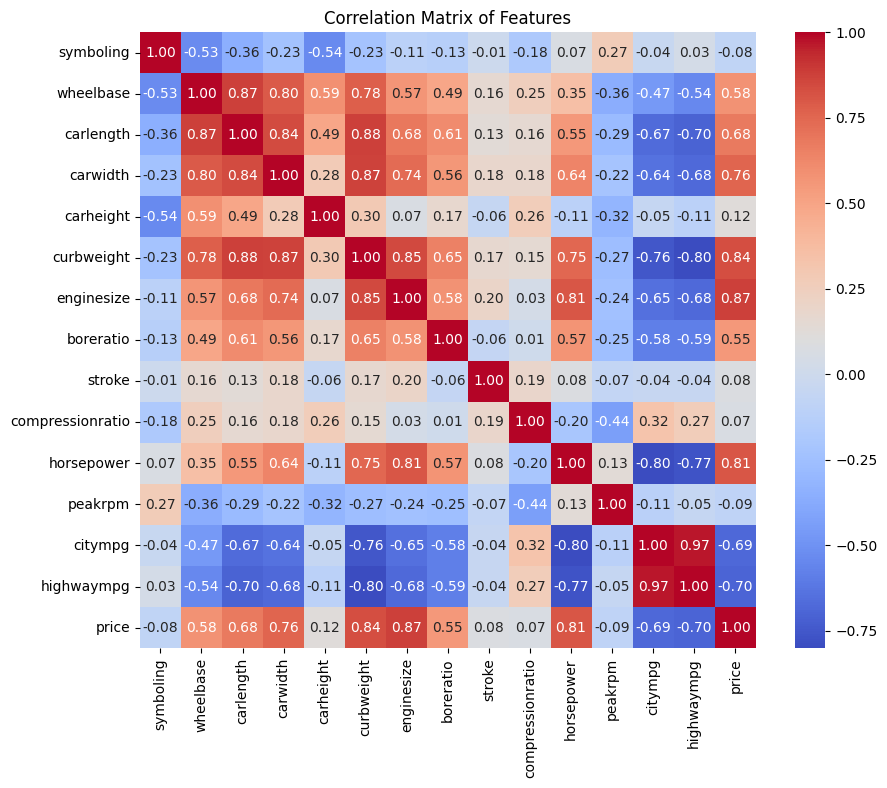

In [22]:
plt.figure(figsize=(10, 8))
corr_matrix = df1.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Matrix of Features')
plt.show()

Plot cost vs. iteration graph

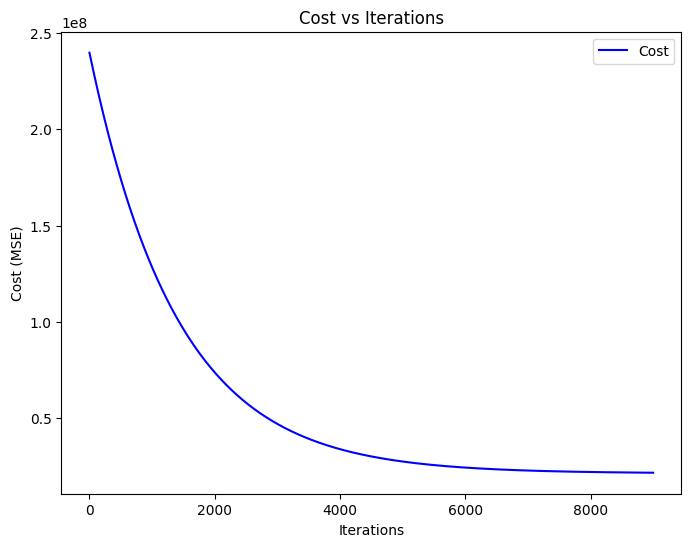

In [23]:
plt.figure(figsize=(8, 6))
plt.plot(range(len(costs)), costs, color='blue', label='Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Cost vs Iterations')
plt.legend()
plt.show()

Convergence graph (cost difference between iterations)

In [ ]:
cost_diff = np.diff(costs)
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(cost_diff) + 1), np.abs(cost_diff), color='green', label='Cost Difference')
plt.xlabel('Iterations')
plt.ylabel('Change in Cost')
plt.title('Convergence of Gradient Descent')
plt.legend()
plt.show()

Plot regression line

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred, color='red', label='Regression line')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Car Price Prediction using Linear Regression')
plt.legend()
plt.show()